In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mcmhist = uproot.open("LangauFitP4.root") #Saved root histogram pre-fitted in the root macro
mcm = uproot.open("LangauFitP4.root:h0_l0r5m3d4") #Pull the fit function separately
simhist = uproot.open("LangauFit212.root")
sim = uproot.open("LangauFit212.root:h0_l0r5m3d4") #Pull the fit function separately

In [3]:
hist_mcm = mcmhist["h0_l0r5m3d4"] #This variable involves the actual histogram, not the fit
mcmedges = hist_mcm.axis().edges()  # Using h1's binning
mcm_vals = hist_mcm.values()

hist_sim = simhist["h0_l0r5m3d4"] #This variable involves the actual histogram, not the fit
simedges = hist_sim.axis().edges()  # Using h1's binning
sim_vals = hist_sim.values()

scale_factor = mcm_vals.sum() / sim_vals.sum()
scaled_sim = sim_vals * scale_factor

In [4]:
#Need to save the x and y values of the fit
f = mcm.member("fFunctions")[0]
l = list(f.member("fSave"))                                 
x_list = np.linspace(l[-2], l[-1], len(l[:-2])) #x_values of the landgau function
y_list = l[:-2] #y_values of the landgau function 
y_vals = []

for item in y_list:
    y_vals = np.append(y_vals, float(item))

fsim = sim.member("fFunctions")[0]
lsim = list(fsim.member("fSave"))
xsim_list = np.linspace(lsim[-2], lsim[-1], len(lsim[:-2]))
ysim_list = lsim[:-2]

ysim_vals = []

for item in ysim_list:
    ysim_vals = np.append(ysim_vals, float(item)*scale_factor)

mcmmpvvals = "MPV: " + str( "%.3f" % f.member('fParams').member('fParameters')[1]) + " " + u"\u00B1" + " " + str("%.3f" % f.member('fParErrors')[1] ) + " MeV"
simmpvvals = "MPV: " + str( "%.3f" % fsim.member('fParams').member('fParameters')[1]) + " " + u"\u00B1" + " " + str("%.3f" % fsim.member('fParErrors')[1] ) + " MeV"


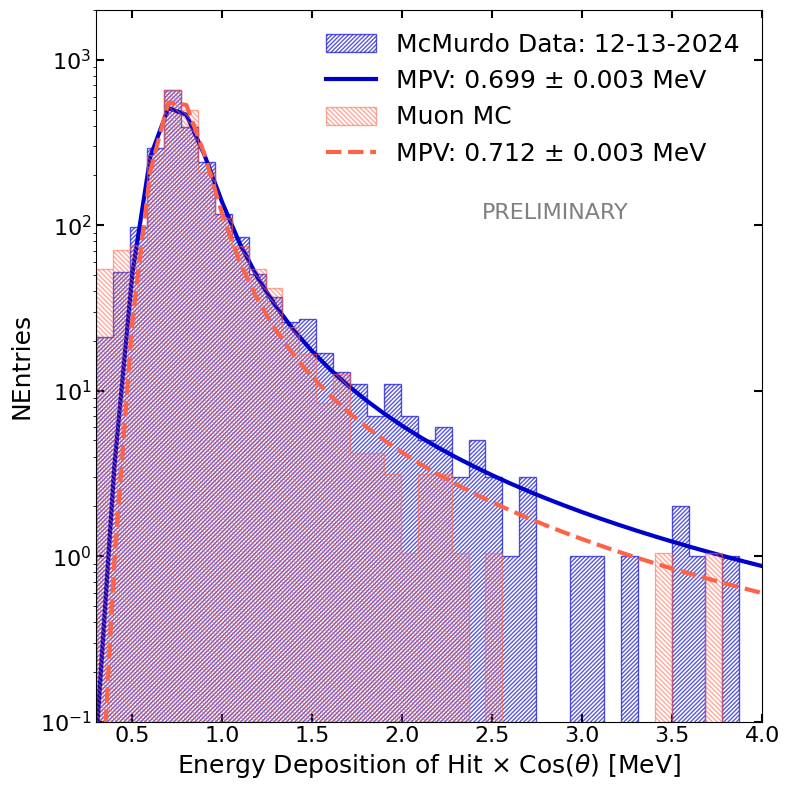

In [6]:
plt.figure(figsize=(8, 8))

plt.hist(mcmedges[:-1], bins=mcmedges, histtype='step', hatch='////////', weights=mcm_vals, alpha=0.65, label=hist_mcm.name,color='mediumblue')
plt.plot(x_list, y_vals, color="mediumblue", linewidth = 3) #Plot the fit
plt.hist(simedges[:-1], bins=simedges, histtype='step', hatch = '\\\\\\\\\\\\\\', weights=scaled_sim, alpha=0.55, label=hist_sim.name,color='tomato')
plt.plot(xsim_list, ysim_vals, color="tomato",linestyle='--',linewidth = 3) #Plot the fit

plt.xlabel("Energy Deposition of Hit $\\times$ Cos($\\theta$) [MeV]", fontsize = 18)
plt.ylabel("NEntries", fontsize = 18)
plt.tick_params(axis='both', labelsize=12)
plt.title('')

#Axis formatting
ax = plt.gca()
ax.tick_params(axis='both', which='major', direction='in', labelsize=16, width=1.5, length=6, top=True, right=True, labeltop=False, labelright=False)

plt.legend(['McMurdo Data: 12-13-2024', mcmmpvvals, 'Muon MC', simmpvvals], fontsize = 18,frameon=False)

# adding 'PRELIMINARY' watermark right below the legend (currently in top left corner)
ax.text(0.8, 0.7, 'PRELIMINARY', verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, color='gray', fontsize=16)

plt.xlim(0.3, 4)
plt.ylim(0.1, 2000)
plt.yscale('log')
plt.tight_layout()
plt.savefig('MCM_and_Sim_MPV_Landgau.png')
plt.savefig('MCM_and_Sim_MPV_Landgau.pdf')
plt.show()

#mcmmpvvals = str(round(list(f.member("fFormula").member("fClingParameters"))[1], 2)) + " $\pm$ " + str(round(list(f.member("fFormula").member("fClingParameters"))[2], 2)) + " MeV"
#simmpvvals = str(round(list(fsim.member("fFormula").member("fClingParameters"))[1], 2)) + " $\pm$ " + str(round(list(fsim.member("fFormula").member("fClingParameters"))[2], 2)) + " MeV"
